# German Credit Risk

In [2]:
import pandas as pd
file_path = '/Users/DELL/OneDrive/EDA/german_credit_data.csv'
df= pd.read_csv(file_path)

In [3]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [4]:
df = df.drop(df.columns[0], axis=1)

In [5]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [6]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [7]:
df.fillna('No information', inplace=True)

In [8]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,No information,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,No information,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,No information,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,No information,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


# Exploratory Data Analysis

In [11]:
print("Basic Info about the DataFrame:")
print(df.info())

Basic Info about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB
None


In [12]:
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Summary Statistics for Numerical Columns:
               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


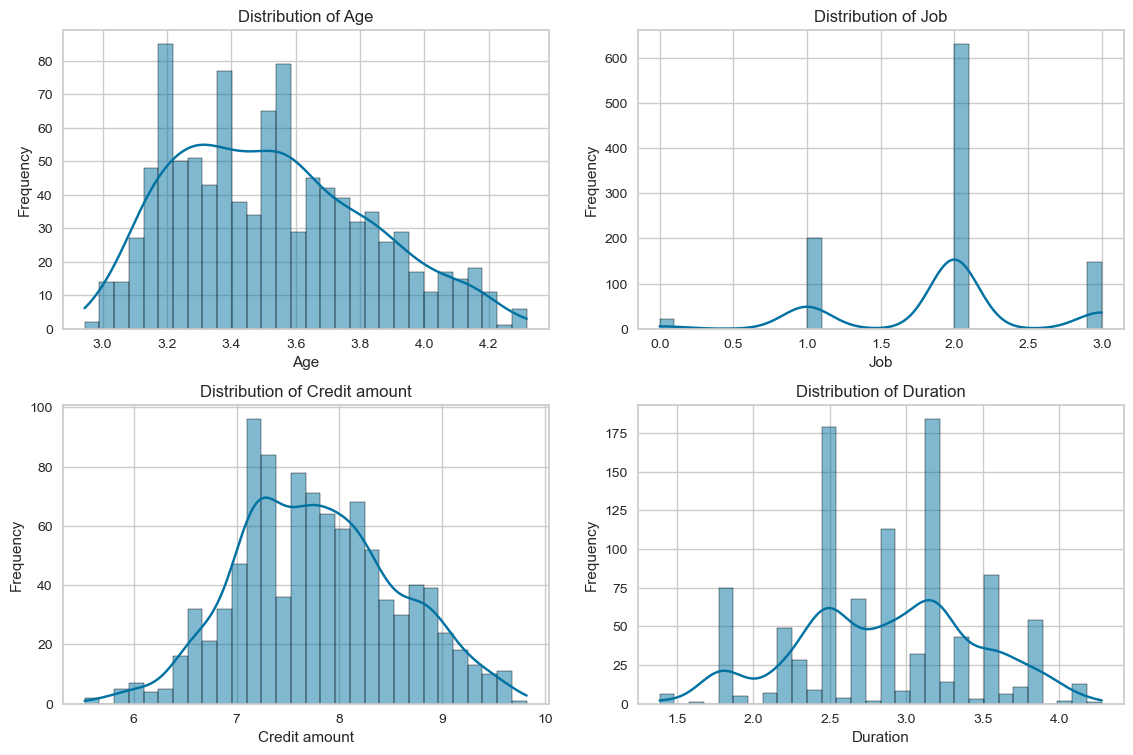

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(numerical_columns) // 2, ncols=2, figsize=(12, 4 * len(numerical_columns) // 2))
fig.tight_layout(pad=3.0)

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.show()


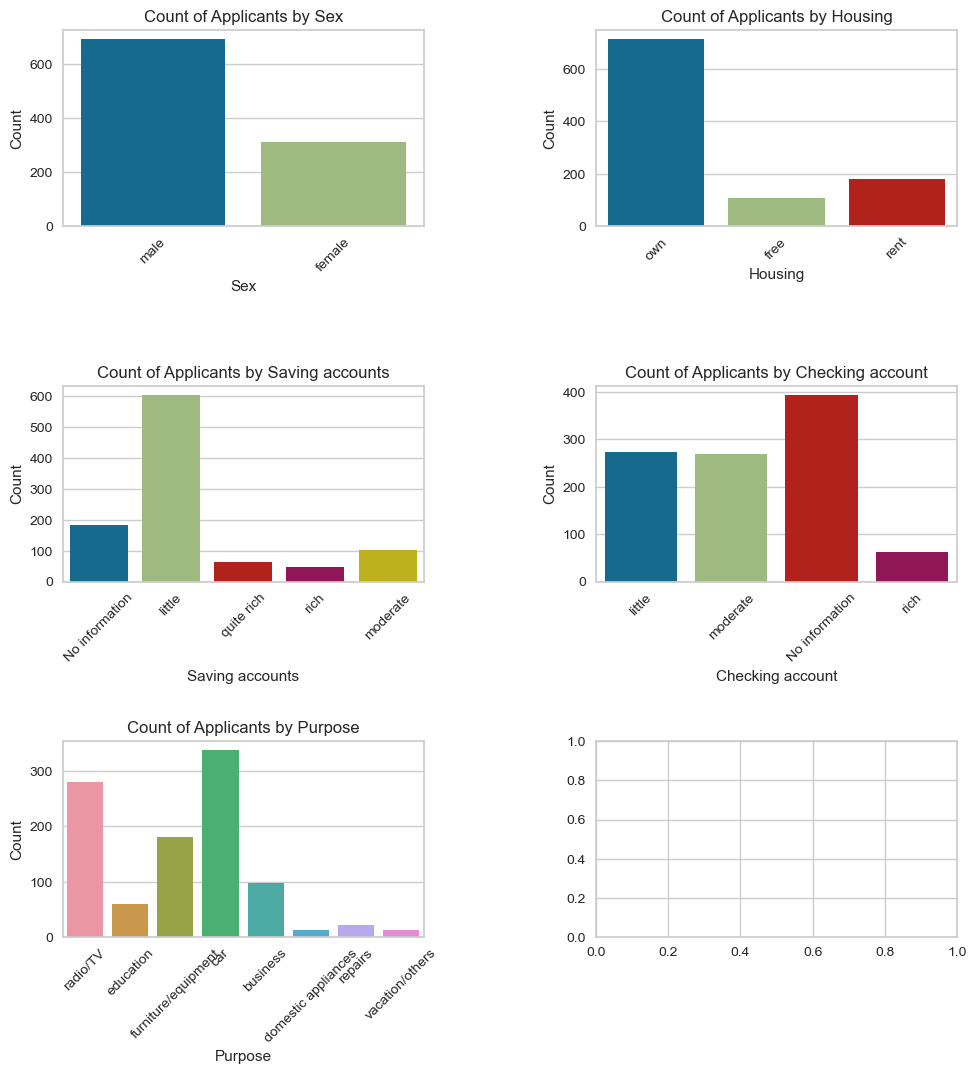

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

categorical_columns = df.select_dtypes(include=['object']).columns

num_cols = 2
num_rows = math.ceil(len(categorical_columns) / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows))
fig.tight_layout(pad=8.0)

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    if i < len(axes):  # Check to avoid IndexError
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Count of Applicants by {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)  # Adjust rotation here

plt.show()


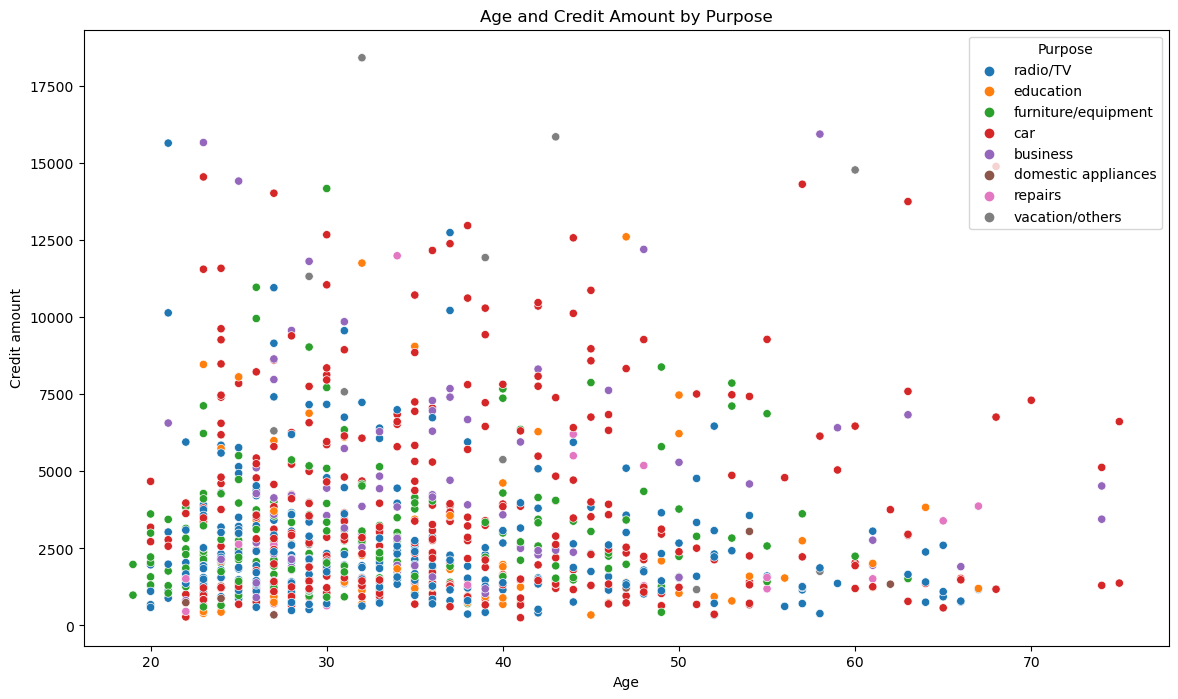

In [15]:
#Age and Credit Amount by Purpose:

plt.figure(figsize=(14, 8))
sns.scatterplot(x='Age', y='Credit amount', hue='Purpose', data=df)
plt.title('Age and Credit Amount by Purpose')
plt.xlabel('Age')
plt.ylabel('Credit amount')
plt.show()


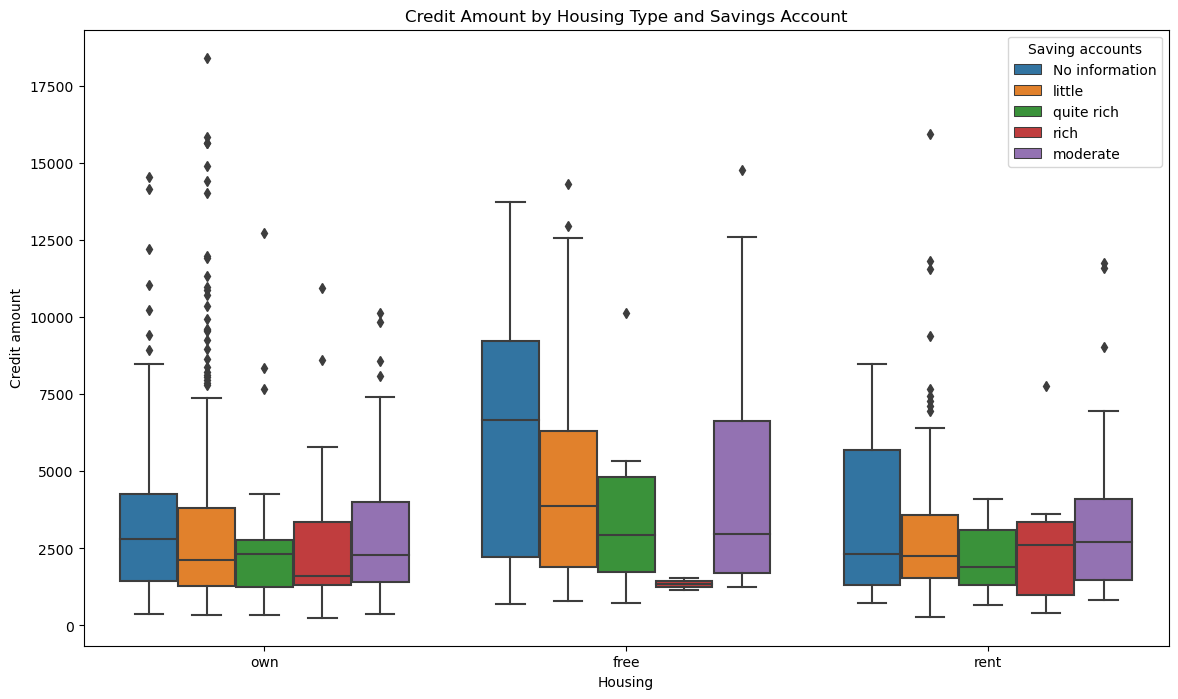

In [16]:
#Distribution of Credit Amount by Housing Type and Savings Account:

plt.figure(figsize=(14, 8))
sns.boxplot(x='Housing', y='Credit amount', hue='Saving accounts', data=df)
plt.title('Credit Amount by Housing Type and Savings Account')
plt.xlabel('Housing')
plt.ylabel('Credit amount')
plt.show()


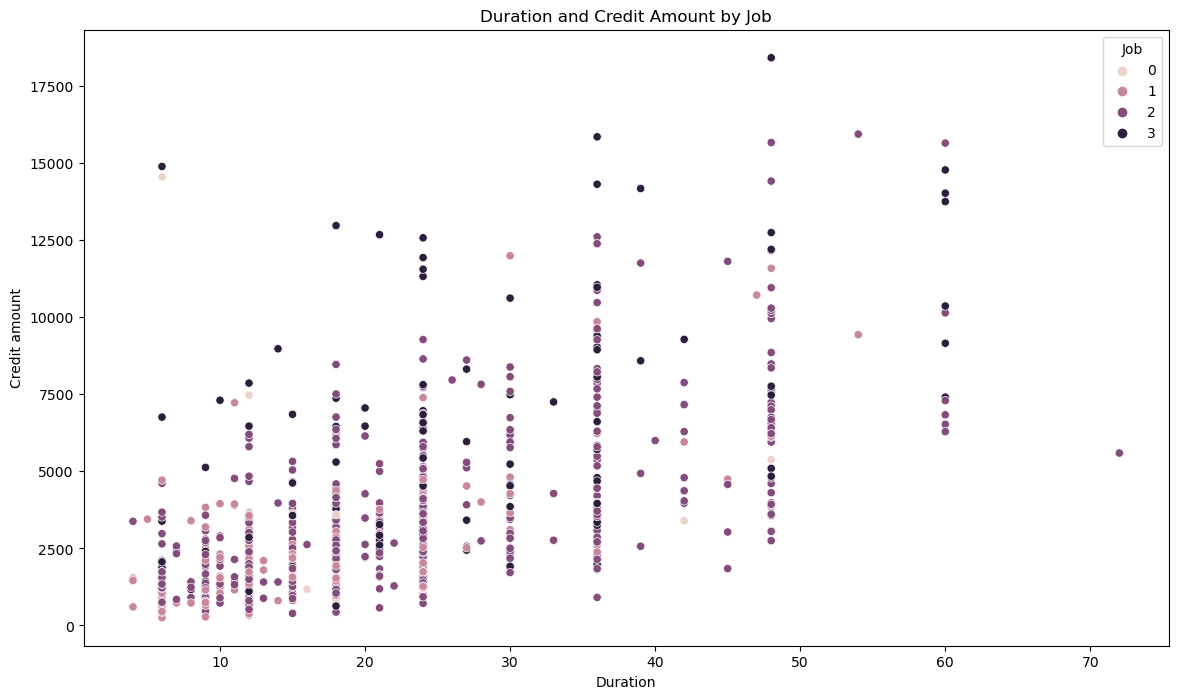

In [17]:
#duration and credit amount by job:

plt.figure(figsize=(14, 8))
sns.scatterplot(x='Duration', y='Credit amount', hue='Job', data=df)
plt.title('Duration and Credit Amount by Job')
plt.xlabel('Duration')
plt.ylabel('Credit amount')
plt.show()


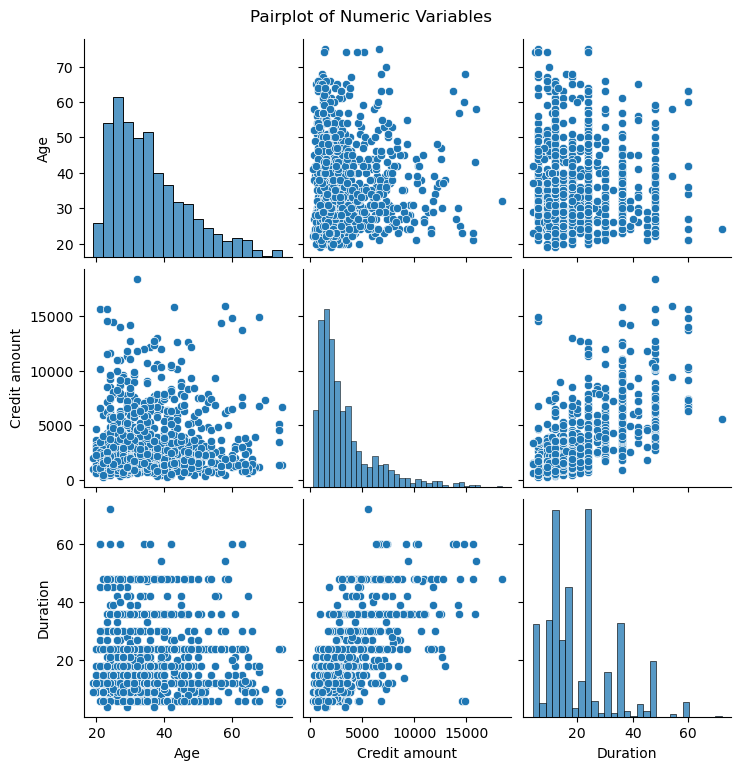

In [18]:
numeric_vars = ['Age', 'Credit amount', 'Duration']
sns.pairplot(df[numeric_vars])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


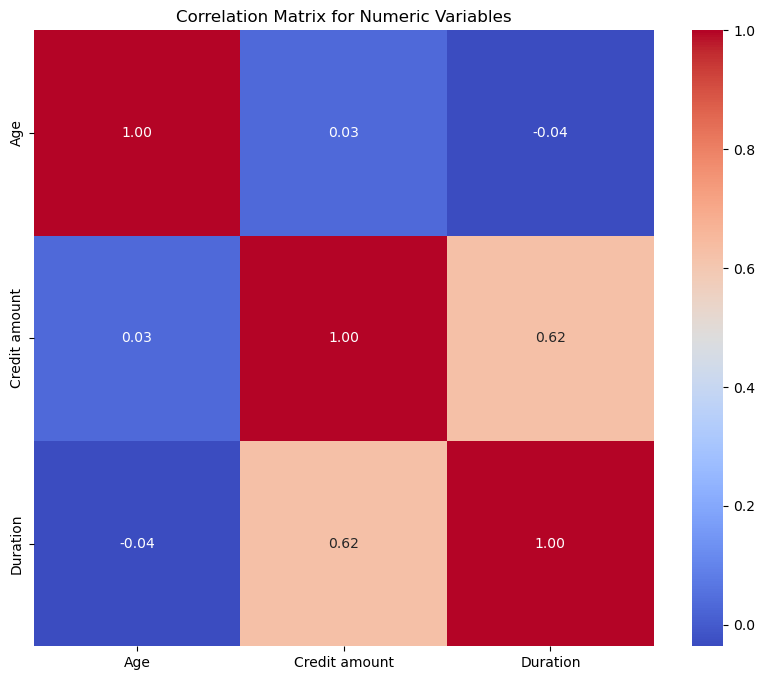

In [19]:
correlation_matrix = df[numeric_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

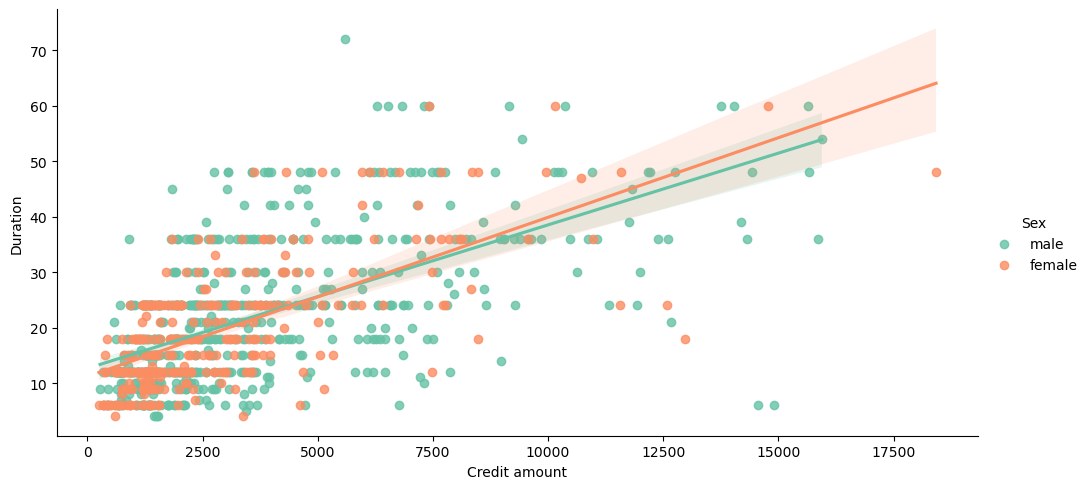

In [20]:
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=df, palette="Set2", aspect=2)
plt.show()

#no difference between genders

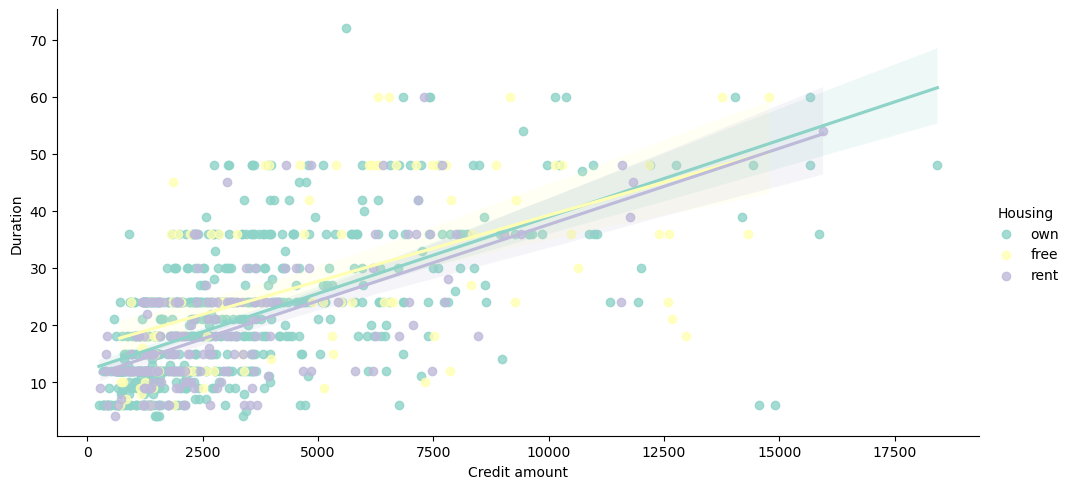

In [21]:
sns.lmplot(x="Credit amount",y="Duration", hue="Housing", data=df, palette="Set3", aspect=2)
plt.show()

#no difference in housing

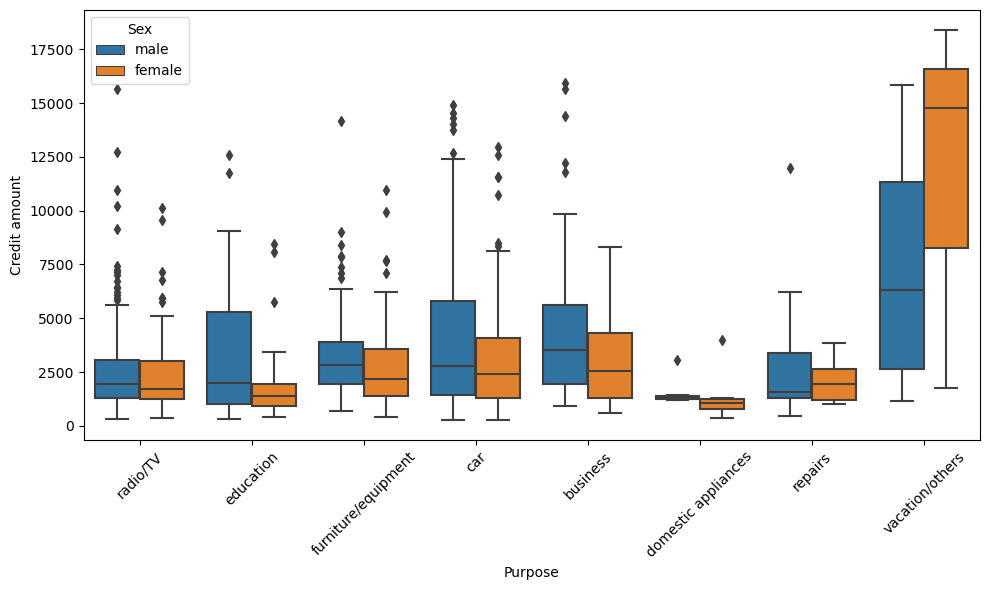

In [22]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()
    
boxes("Purpose","Credit amount","Sex")

#most amount taken by both male and female are for vacations

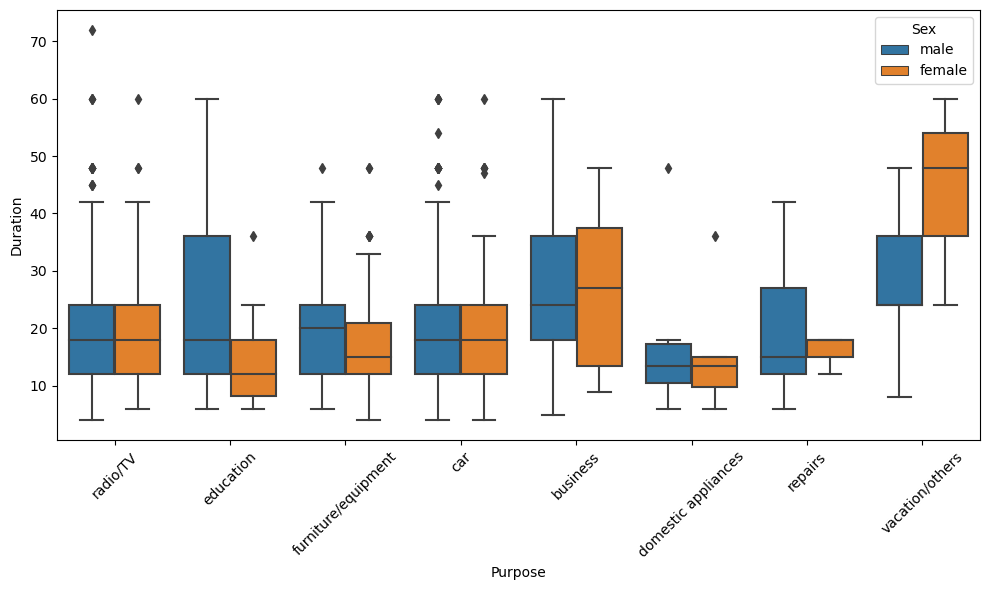

In [23]:
boxes("Purpose","Duration","Sex")

#again the shortest duration is for the purpose of domestic appliances

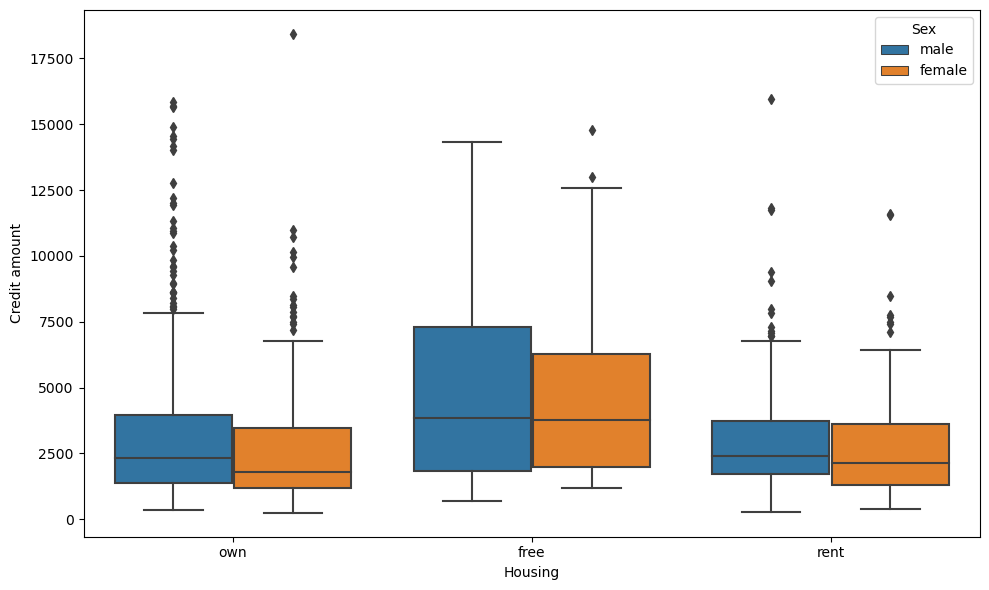

In [24]:
boxes("Housing","Credit amount","Sex",r=0)

#people with free housing takes more credit

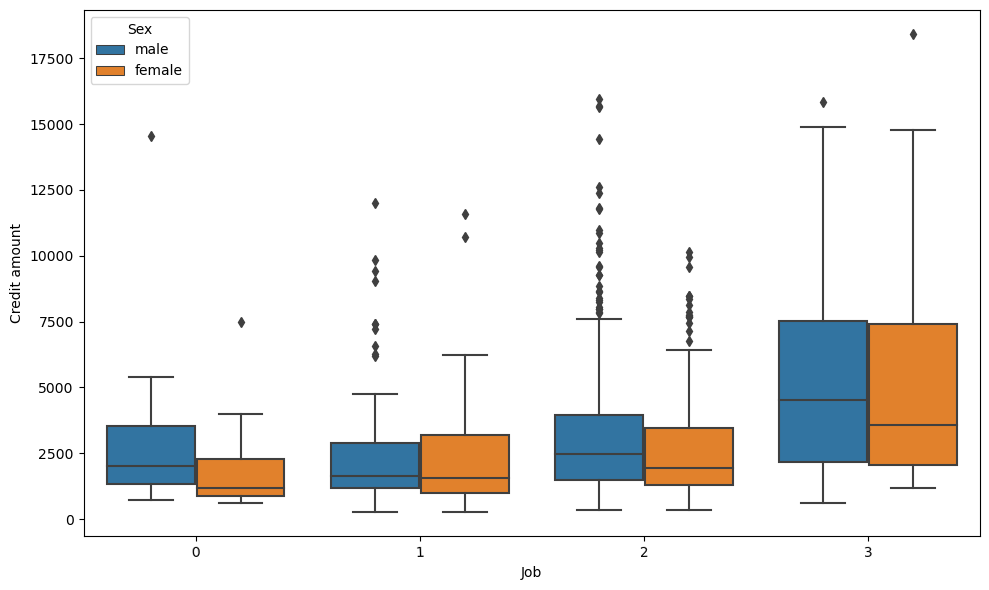

In [25]:
boxes("Job","Credit amount","Sex",r=2)

#job 3 which is hihghly skilled takes more credit but does not depend on gender

# preprocessing

In [9]:
#As we saw the numerical variables were skewed, therefore, we will take the logarithm to remove skewness

import numpy as np

Skewed_columns = ["Age","Credit amount", "Duration"]
df[Skewed_columns] = np.log(df[Skewed_columns])


In [10]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,4.204693,male,2,own,No information,little,7.063904,1.791759,radio/TV
1,3.091042,female,2,own,little,moderate,8.691315,3.871201,radio/TV
2,3.891820,male,1,own,little,No information,7.647786,2.484907,education
3,3.806662,male,2,free,little,little,8.972337,3.737670,furniture/equipment
4,3.970292,male,2,free,little,little,8.490849,3.178054,car
...,...,...,...,...,...,...,...,...,...
995,3.433987,female,1,own,little,No information,7.459339,2.484907,furniture/equipment
996,3.688879,male,3,own,little,little,8.257645,3.401197,car
997,3.637586,male,2,own,little,No information,6.689599,2.484907,radio/TV
998,3.135494,male,2,free,little,little,7.520235,3.806662,radio/TV


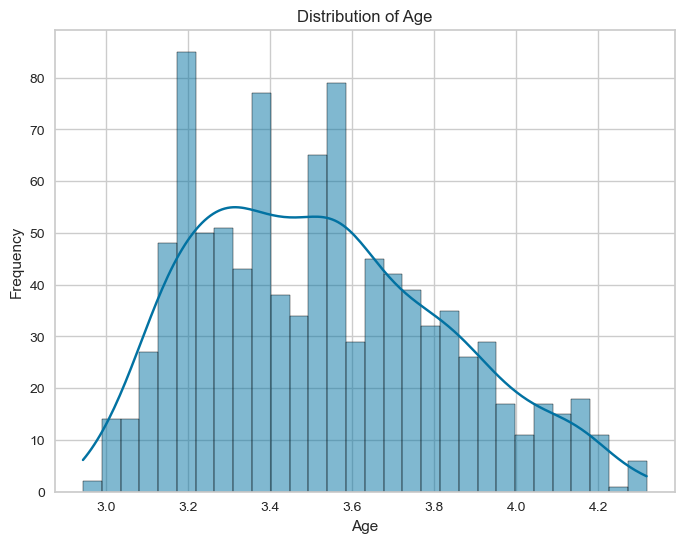

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#now not right skewed

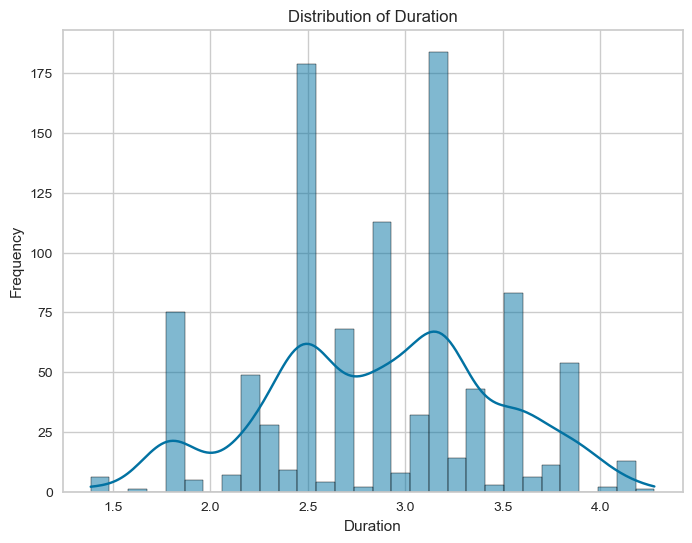

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

#not skewed

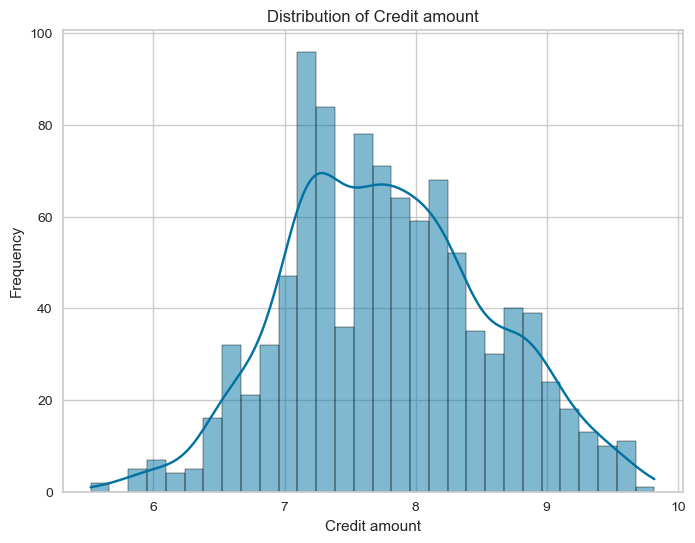

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Credit amount'], bins=30, kde=True)
plt.title('Distribution of Credit amount')
plt.xlabel('Credit amount')
plt.ylabel('Frequency')
plt.show()

#not skewedS

In [19]:
#label encoding for categorical variables
categorical = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for label in categorical:
    df[label] = encoder.fit_transform(df[label])
df[categorical]


,Sex,Housing,Saving accounts,Checking account,Purpose
0,1,1,0,1,5
1,0,1,1,2,5
2,1,1,1,0,3
3,1,0,1,1,4
4,1,0,1,1,1
...,...,...,...,...,...
995,0,1,1,0,4
996,1,1,1,1,1
997,1,1,1,0,5
998,1,0,1,1,5


In [20]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)
df_scaled

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.271006,0.670280,0.146949,-0.133710,-1.231393,-0.001045,-0.933901,-1.864869,1.073263
1,-1.446152,-1.491914,0.146949,-0.133710,-0.196609,1.044372,1.163046,1.708369,1.073263
2,1.226696,0.670280,-1.383771,-0.133710,-0.196609,-1.046463,-0.181559,-0.673790,0.061705
3,0.942455,0.670280,0.146949,-2.016956,-0.196609,-0.001045,1.525148,1.478913,0.567484
4,1.488620,0.670280,0.146949,-2.016956,-0.196609,-0.001045,0.904743,0.517289,-0.949853
...,...,...,...,...,...,...,...,...,...
995,-0.301466,-1.491914,-1.383771,-0.133710,-0.196609,-1.046463,-0.424376,-0.673790,0.567484
996,0.549317,0.670280,1.677670,-0.133710,-0.196609,-0.001045,0.604255,0.900731,-0.949853
997,0.378110,0.670280,0.146949,-0.133710,-0.196609,-1.046463,-1.416199,-0.673790,1.073263
998,-1.297780,0.670280,0.146949,-2.016956,-0.196609,-0.001045,-0.345911,1.597468,1.073263


# PCA

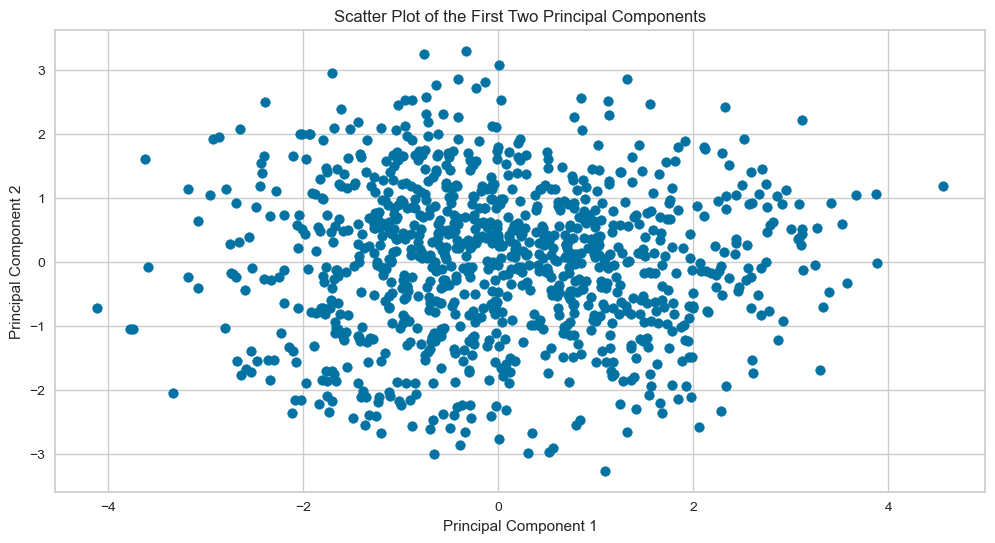

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot scatter of the first two principal components
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of the First Two Principal Components')
plt.show()

# Clustering

# K-Means

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

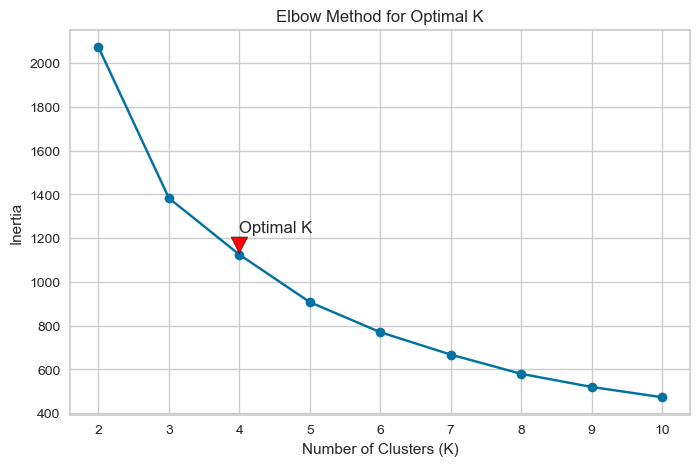

In [36]:
inertia_values = []
for k in range(2, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(pca_df)
    inertia_values.append(kmeans_model.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

plt.annotate('Optimal K',
             xy=(4, inertia_values[2]),  # Adjust the coordinates based on your plot
             xytext=(4, inertia_values[2] + 100),  # Adjust the text position
             arrowprops=dict(facecolor='red', shrink=0.05),
             )

plt.show()

# silhouette score

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

Optimal K based on Silhouette Score: 3


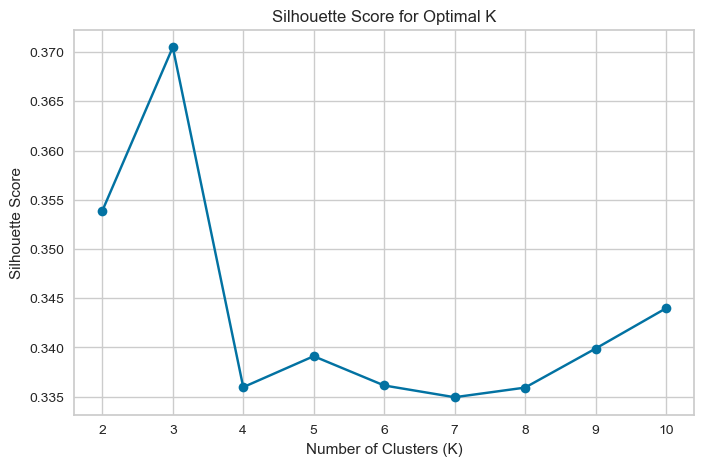

In [34]:
silhouette_scores = []
for k in range(2, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans_model.fit_predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

optimal_k_silhouette = np.argmax(silhouette_scores) + 2  # Adding 2 because the range starts from 2
max_silhouette_score = silhouette_scores[optimal_k_silhouette - 2]  # Adjust index for the range

print(f"Optimal K based on Silhouette Score: {optimal_k_silhouette}")


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


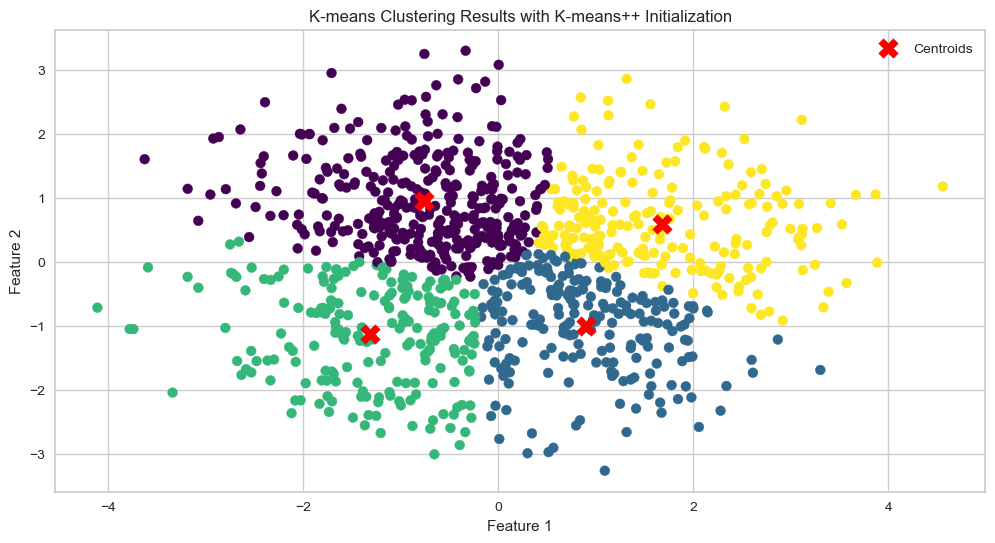

In [36]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
pca_df['KM_labels'] = kmeans.fit_predict(pca_df)

# Visualize the clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['KM_labels'], s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-means Clustering Results with K-means++ Initialization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [38]:
pca_df

,PC1,PC2,KM_labels
0,-0.888188,2.521057,2
1,0.837677,-2.479700,3
2,-0.507651,1.629093,2
3,2.600507,0.913520,0
4,2.110744,1.792416,0
...,...,...,...
995,-1.567216,-0.160191,1
996,1.966435,0.059883,0
997,-0.986265,1.220903,2
998,1.097257,-0.014553,0


In [40]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
pca_df['KM_labels'] = kmeans.fit_predict(pca_df)
kmeans_labels= pca_df['KM_labels']

# Assign cluster labels to the DataFrame
df_clustered_kmeans = df_scaled.assign(Cluster=kmeans_labels)

# Group by cluster and calculate means
grouped_kmeans = df_clustered_kmeans.groupby(['Cluster']).mean().round(1)

# Display the grouped means
print(grouped_kmeans)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         Age  Sex  Job  Housing  Saving accounts  Checking account  \
Cluster                                                              
0        0.7  0.5  0.6     -0.8             -0.3              -0.2   
1       -0.9 -1.0 -0.2      0.9              0.1               0.1   
2        0.4  0.3 -0.5     -0.2              0.2              -0.0   
3       -0.5 -0.0  0.4      0.2             -0.1               0.2   

         Credit amount  Duration  Purpose  
Cluster                                    
0                  0.8       0.7     -0.4  
1                 -0.5      -0.4      0.2  
2                 -0.7      -0.7      0.1  
3                  0.8       0.9     -0.0  


In [41]:
print("Unique values in 'KM_labels':", pca_df['KM_labels'].unique())

cluster_stats = pca_df.groupby('KM_labels')
cluster_sizes = pca_df['KM_labels'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

Unique values in 'KM_labels': [2 3 0 1]
Cluster Sizes:
2    353
1    217
0    216
3    214
Name: KM_labels, dtype: int64


Average Silhouette Score: 0.3359682390162443


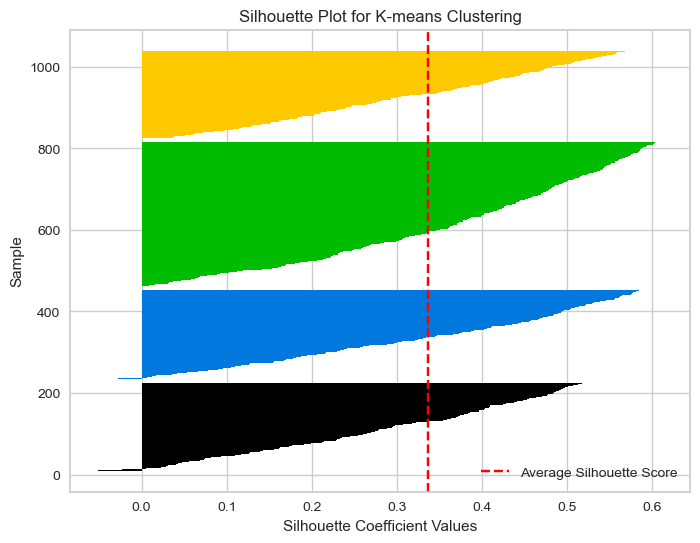

In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['KM_labels'])
print(f"Average Silhouette Score: {silhouette_avg}")

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(pca_df[['PC1', 'PC2']], pca_df['KM_labels'])

# Plot the silhouette plot
plt.figure(figsize=(8, 6))

# Set up the vertical space for each cluster
y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[pca_df['KM_labels'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 4)
    plt.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1, edgecolor='none', color=color)

    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
plt.title("Silhouette Plot for K-means Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Sample")
plt.legend()
plt.show()

# Agglomerative Clustering

In [44]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import datasets

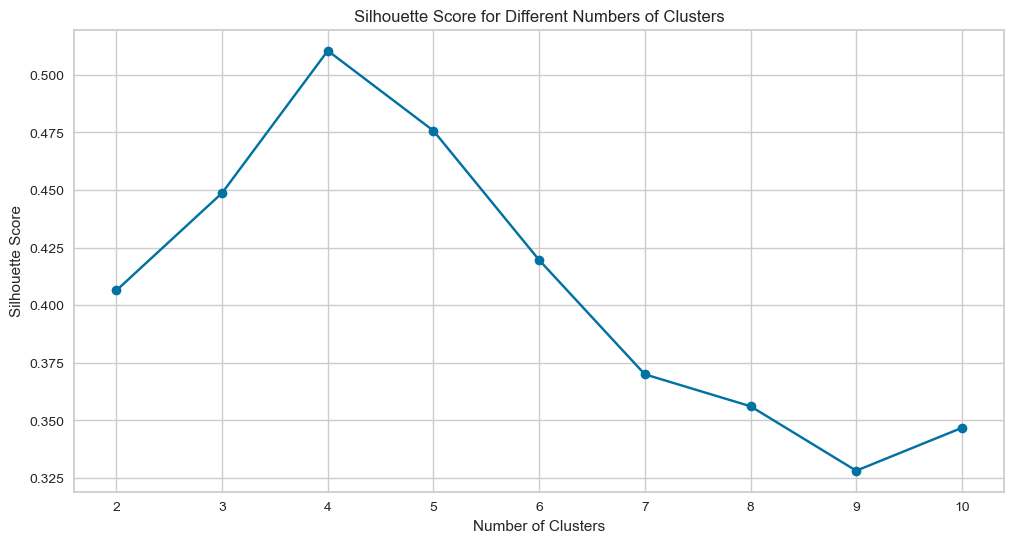

Optimal K based on Silhouette Score: 4


In [45]:
silhouette_scores = []
for n_clusters in range(2, 11):
    agglomerative_model = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglomerative_model.fit_predict(pca_df)
    silhouette_scores.append(silhouette_score(pca_df, cluster_labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

optimal_k_silhouette = np.argmax(silhouette_scores) + 2  # Adding 2 because the range starts from 2
max_silhouette_score = silhouette_scores[optimal_k_silhouette - 2]  # Adjust index for the range

print(f"Optimal K based on Silhouette Score: {optimal_k_silhouette}")

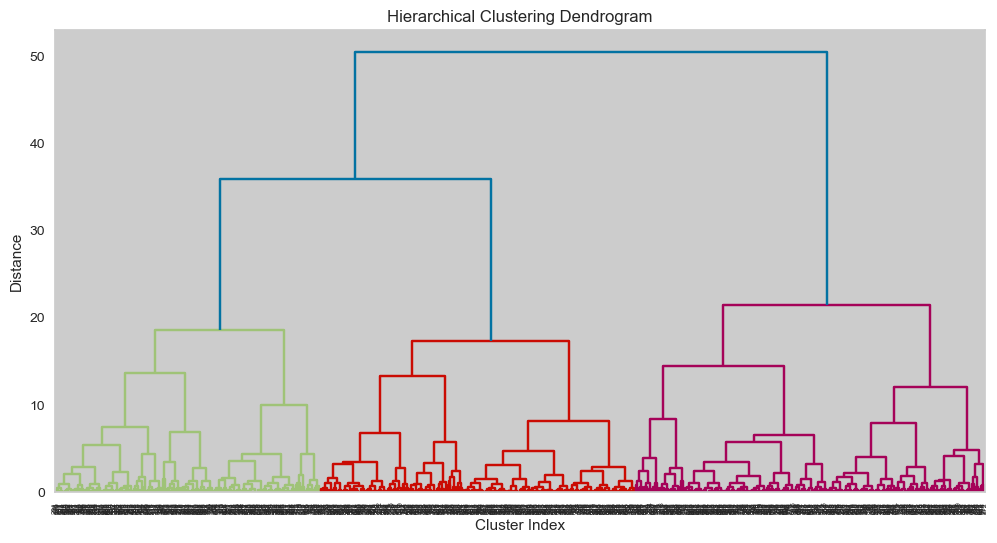

In [46]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply hierarchical clustering
hc = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
pca_df['HC_labels'] = hc.fit_predict(pca_df[['PC1', 'PC2']])

# Plot the hierarchical clustering dendrogram
linked = linkage(pca_df[['PC1', 'PC2']], method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()

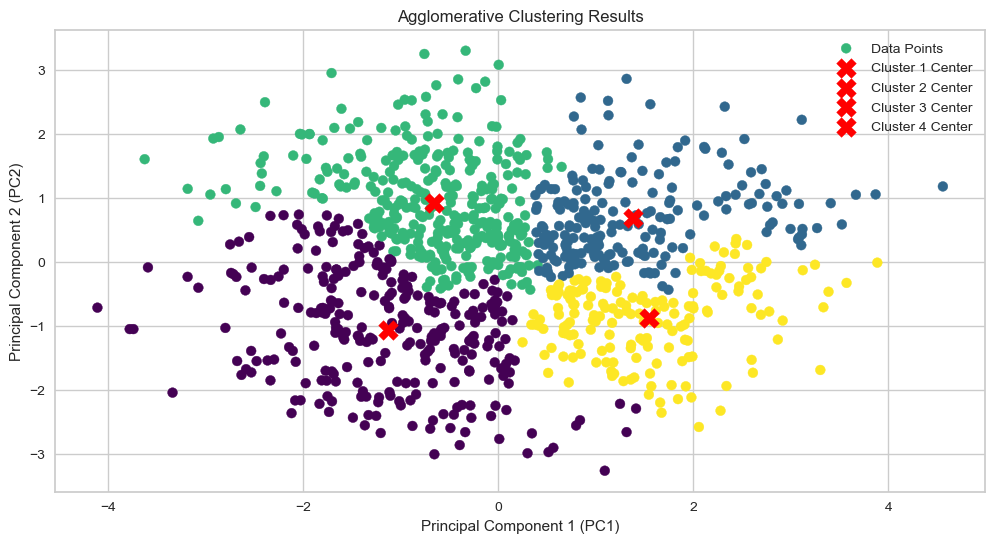

In [47]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

agg_cluster = AgglomerativeClustering(n_clusters=4).fit(pca_df[['PC1', 'PC2']])
pca_df['Agg_labels'] = agg_cluster.labels_

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Agg_labels'], s=50, cmap='viridis', label='Data Points')

for cluster in range(4):
    cluster_mask = pca_df['Agg_labels'] == cluster
    cluster_center = pca_df.loc[cluster_mask, ['PC1', 'PC2']].mean(axis=0)
    plt.scatter(cluster_center['PC1'], cluster_center['PC2'], marker='X', s=200, color='red', label=f'Cluster {cluster + 1} Center')

plt.title('Agglomerative Clustering Results')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

In [52]:
pca_df

,PC1,PC2,KM_labels,HC_labels,Agg_labels
0,-0.888188,2.521057,2,2,2
1,0.837677,-2.479700,3,0,0
2,-0.507651,1.629093,2,2,2
3,2.600507,0.913520,0,1,1
4,2.110744,1.792416,0,1,1
...,...,...,...,...,...
995,-1.567216,-0.160191,1,0,0
996,1.966435,0.059883,0,3,3
997,-0.986265,1.220903,2,2,2
998,1.097257,-0.014553,0,1,1


In [49]:
Agg_label= pca_df['Agg_labels']

# Assign cluster labels to the DataFrame
df_clustered_Agg_labels = df_scaled.assign(Cluster=Agg_label)

# Group by cluster and calculate means
grouped_Agg_labels = df_clustered_Agg_labels.groupby(['Cluster']).mean().round(1)

# Display the grouped means
print(grouped_Agg_labels)


         Age  Sex  Job  Housing  Saving accounts  Checking account  \
Cluster                                                              
0       -0.8 -0.9 -0.2      0.8              0.1               0.1   
1        0.7  0.6  0.5     -0.8             -0.2              -0.2   
2        0.4  0.3 -0.4     -0.2              0.1              -0.0   
3       -0.3  0.1  0.6     -0.1             -0.1               0.1   

         Credit amount  Duration  Purpose  
Cluster                                    
0                 -0.4      -0.3      0.3  
1                  0.6       0.5     -0.3  
2                 -0.6      -0.6      0.1  
3                  1.2       1.1     -0.2  


In [50]:
print("Unique values in 'Agg_labels':", pca_df['Agg_labels'].unique())

cluster_stats = pca_df.groupby('Agg_labels')
cluster_sizes = pca_df['Agg_labels'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

Unique values in 'Agg_labels': [2 0 1 3]
Cluster Sizes:
2    340
0    285
1    205
3    170
Name: Agg_labels, dtype: int64


Average Silhouette Score: 0.29859880402716676


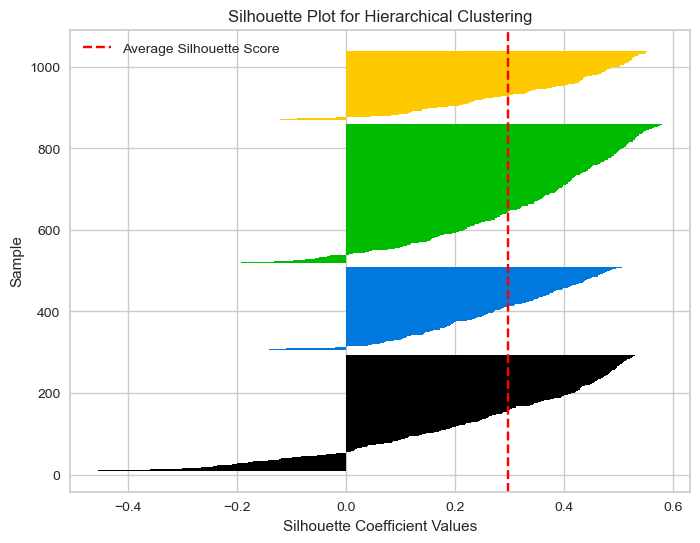

In [53]:
# Calculate silhouette scores
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Agg_labels'])
print(f"Average Silhouette Score: {silhouette_avg}")

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(pca_df[['PC1', 'PC2']], pca_df['Agg_labels'])

# Plot the silhouette plot
plt.figure(figsize=(8, 6))

# Set up the vertical space for each cluster
y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[pca_df['Agg_labels'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 4)
    plt.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1, edgecolor='none', color=color)

    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
plt.title("Silhouette Plot for Hierarchical Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Sample")
plt.legend()
plt.show()

# DBSCAN Clustering

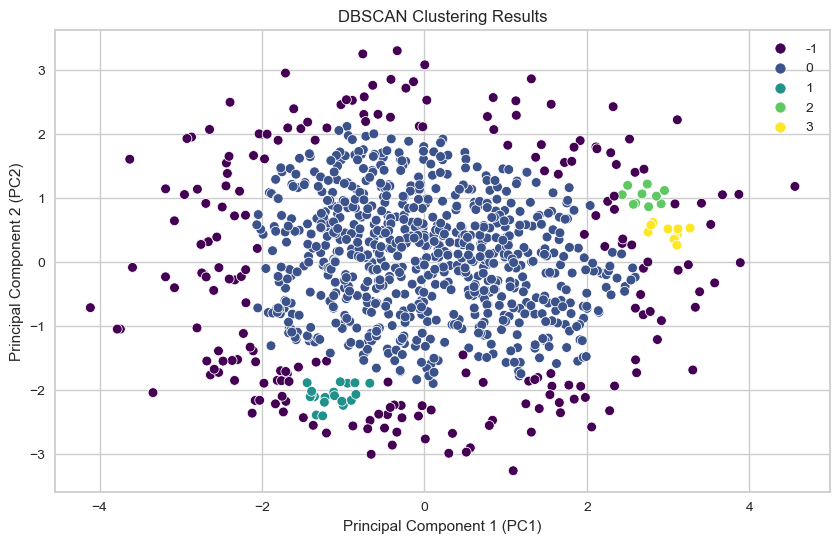

In [99]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

dbscan_cluster = DBSCAN(eps=0.3, min_samples=10)
pca_df['DBSCAN_labels'] = dbscan_cluster.fit_predict(pca_df[['PC1', 'PC2']])

# Plot DBSCAN clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_labels', data=pca_df, palette='viridis', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()


In [100]:
pca_df

,PC1,PC2,KM_labels,HC_labels,Agg_labels,DB_labels,DBSCAN_labels
0,-0.888188,2.521057,2,2,2,0,-1
1,0.837677,-2.479700,3,0,0,-1,-1
2,-0.507651,1.629093,2,2,2,0,0
3,2.600507,0.913520,0,1,1,1,2
4,2.110744,1.792416,0,1,1,1,-1
...,...,...,...,...,...,...,...
995,-1.567216,-0.160191,1,0,0,3,0
996,1.966435,0.059883,0,3,3,5,0
997,-0.986265,1.220903,2,2,2,0,0
998,1.097257,-0.014553,0,1,1,1,0


Average Silhouette Score: 0.030110413568502983


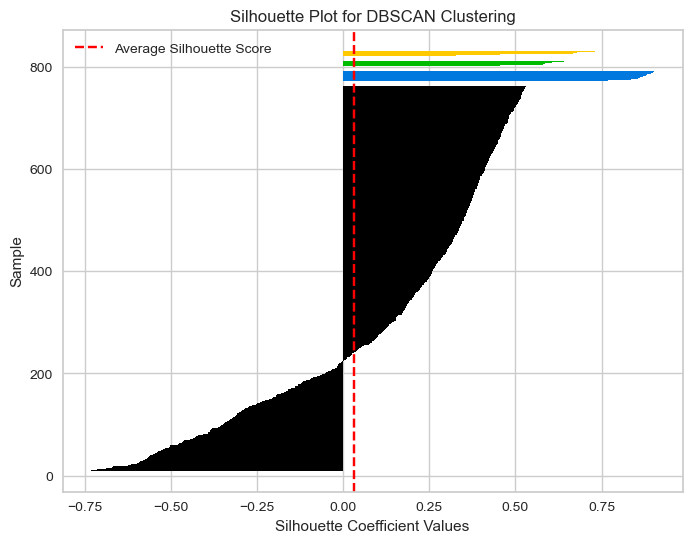

In [101]:
# Calculate silhouette scores
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['DBSCAN_labels'])
print(f"Average Silhouette Score: {silhouette_avg}")

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(pca_df[['PC1', 'PC2']], pca_df['DBSCAN_labels'])

# Plot the silhouette plot
plt.figure(figsize=(8, 6))

# Set up the vertical space for each cluster
y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[pca_df['DBSCAN_labels'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 4)
    plt.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1, edgecolor='none', color=color)

    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
plt.title("Silhouette Plot for DBSCAN Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Sample")
plt.legend()
plt.show()

# Best Model: K means

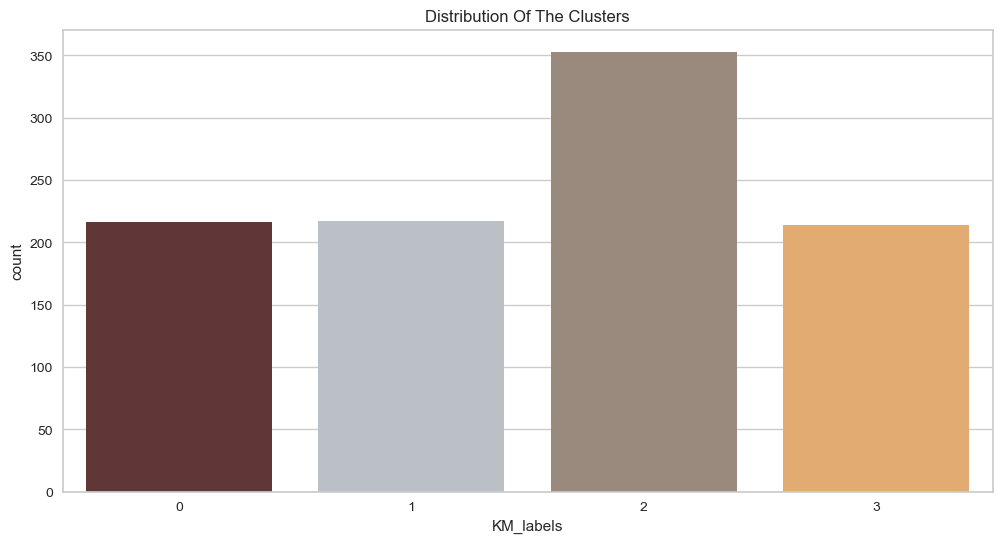

In [102]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=pca_df['KM_labels'], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [104]:
df_scaled["KM_labels"]= kmeans_labels

In [105]:
df_scaled

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,KM_labels
0,2.271006,0.670280,0.146949,-0.133710,-1.231393,-0.001045,-0.933901,-1.864869,1.073263,2
1,-1.446152,-1.491914,0.146949,-0.133710,-0.196609,1.044372,1.163046,1.708369,1.073263,3
2,1.226696,0.670280,-1.383771,-0.133710,-0.196609,-1.046463,-0.181559,-0.673790,0.061705,2
3,0.942455,0.670280,0.146949,-2.016956,-0.196609,-0.001045,1.525148,1.478913,0.567484,0
4,1.488620,0.670280,0.146949,-2.016956,-0.196609,-0.001045,0.904743,0.517289,-0.949853,0
...,...,...,...,...,...,...,...,...,...,...
995,-0.301466,-1.491914,-1.383771,-0.133710,-0.196609,-1.046463,-0.424376,-0.673790,0.567484,1
996,0.549317,0.670280,1.677670,-0.133710,-0.196609,-0.001045,0.604255,0.900731,-0.949853,0
997,0.378110,0.670280,0.146949,-0.133710,-0.196609,-1.046463,-1.416199,-0.673790,1.073263,2
998,-1.297780,0.670280,0.146949,-2.016956,-0.196609,-0.001045,-0.345911,1.597468,1.073263,0


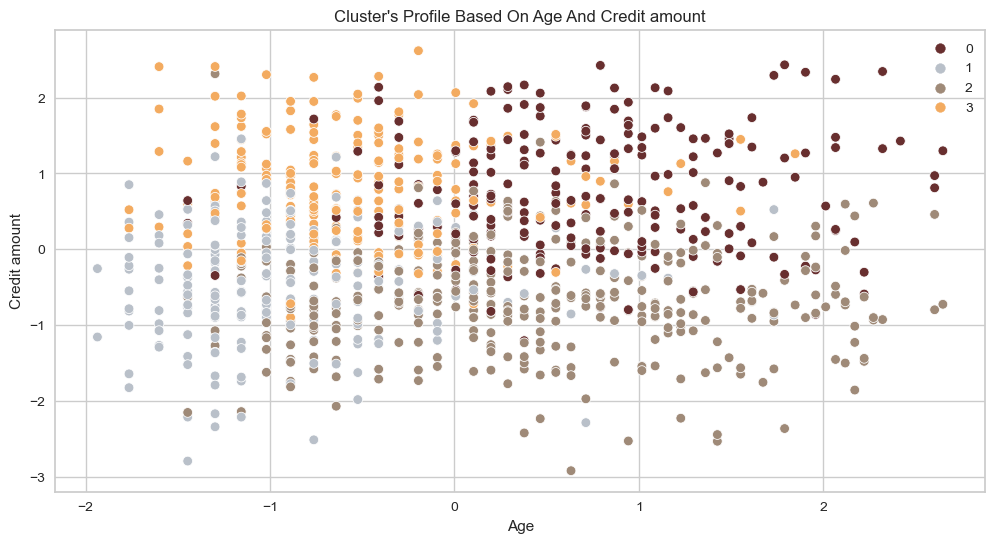

In [110]:
pl = sns.scatterplot(data = df_scaled,x=df_scaled["Age"], y=df_scaled["Credit amount"],hue=df_scaled["KM_labels"], palette= pal)
pl.set_title("Cluster's Profile Based On Age And Credit amount")
plt.legend()
plt.show()

In [109]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,4.204693,1,2,1,0,1,7.063904,1.791759,5
1,3.091042,0,2,1,1,2,8.691315,3.871201,5
2,3.891820,1,1,1,1,0,7.647786,2.484907,3
3,3.806662,1,2,0,1,1,8.972337,3.737670,4
4,3.970292,1,2,0,1,1,8.490849,3.178054,1
...,...,...,...,...,...,...,...,...,...
995,3.433987,0,1,1,1,0,7.459339,2.484907,4
996,3.688879,1,3,1,1,1,8.257645,3.401197,1
997,3.637586,1,2,1,1,0,6.689599,2.484907,5
998,3.135494,1,2,0,1,1,7.520235,3.806662,5
